In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys  
import os 
current_directory = os.getcwd()
print(current_directory)
my_folder_path = os.path.dirname(os.path.join('..',current_directory))
print(my_folder_path)
sys.path.append(my_folder_path)
from utils.preprocess import *
df=load_data('../data/speed_data_data.csv')

x:\elearning\Data Mining\Final\Data-Mining-pj\scripts
x:\elearning\Data Mining\Final\Data-Mining-pj
Raw data loading finished. Including 8378 records.


In [2]:
df =combine_career(df)
no_income_df, income_df = partial_by_income(df)
no_income_df, income_df = truncate_nan(no_income_df), truncate_nan(income_df)
aggr_no_income_df, aggr_income_df = aggregate(no_income_df), aggregate(income_df)

x:\elearning\Data Mining\Final\Data-Mining-pj\utils\preprocess.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[idx]["career"] = "nan"


Have truncated nan. nrows 4099 -> 3217
Have truncated nan. nrows 4279 -> 3501


In [3]:
import seaborn as sns

In [7]:
score_names = ['attr','sinc','intel','fun','amb','shar']
need_features = ['dec','attr','sinc','intel','fun','amb','shar','prob']

df_need = df[need_features]
df_need = truncate_nan(df_need)

# 评分对最终决定的影响
def scores_dec_boxplot(df: pd.DataFrame):
    for idx, score_name in enumerate(score_names):
        score = df[score_name].to_numpy()
        dec = df['dec'].to_numpy()

        data = pd.DataFrame({
            'score': score,
            'dec': dec
        })

        plt.figure(figsize=(8, 6))
        sns.boxplot(x='dec', y='score', data=data)

        # 添加标题和标签
        plt.title('Box Plot of '+score_name+' score by Decision')
        plt.xlabel('dec')
        plt.ylabel(score_name)

        # 显示图形
        plt.savefig(f'../output/boxplots/dec-{score_name}.png', format='png', dpi=300)

Have truncated nan. nrows 8378 -> 6970


In [ ]:
scores_dec_boxplot(df_need)

In [31]:
def scores_prob_hist(df: pd.DataFrame):
    for idx, score_name in enumerate(score_names):
        score = df[score_name].to_numpy()
        prob = df['prob'].to_numpy()

        
        fig=plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(projection='3d')
        hist, xedges, yedges = np.histogram2d(score, prob, bins=10, range=[[0, 10], [0, 10]])
        xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
        xpos = xpos.ravel()
        ypos = ypos.ravel()
        zpos = 0

        dx = dy = np.ones_like(zpos)
        dz = hist.ravel()

        ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')
        ax.set_xlabel(score_name)
        ax.set_ylabel('prob')


        # 添加标题和标签
        plt.title('Histgram of '+score_name+' score and prob')
        # plt.xlabel('dec')
        # plt.ylabel(score_name)

        # 显示图形
        plt.savefig(f'../output/histgrams/prob-{score_name}.png', format='png', dpi=300)

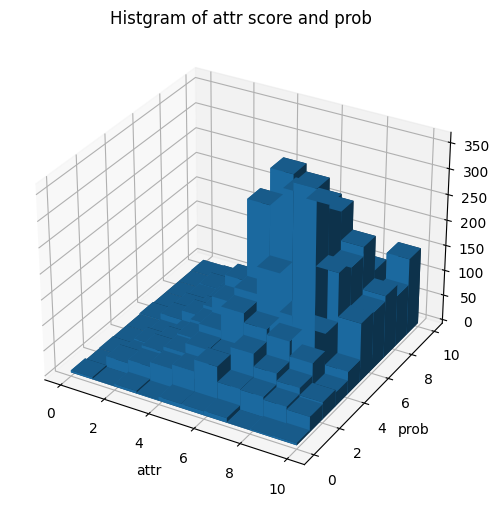

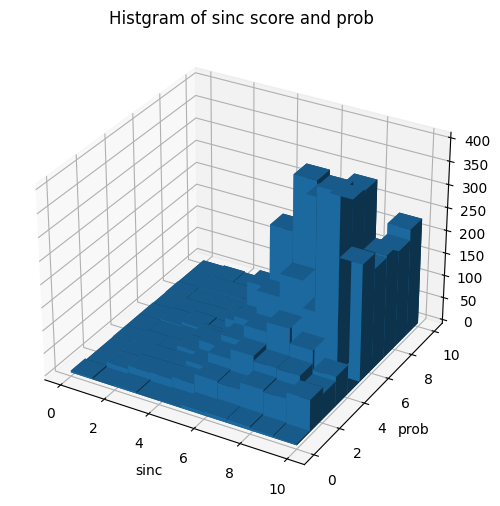

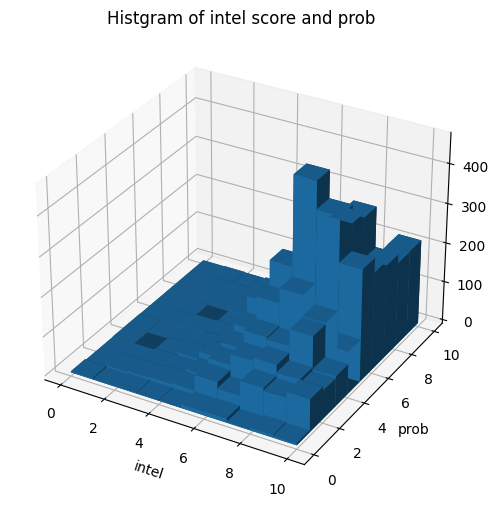

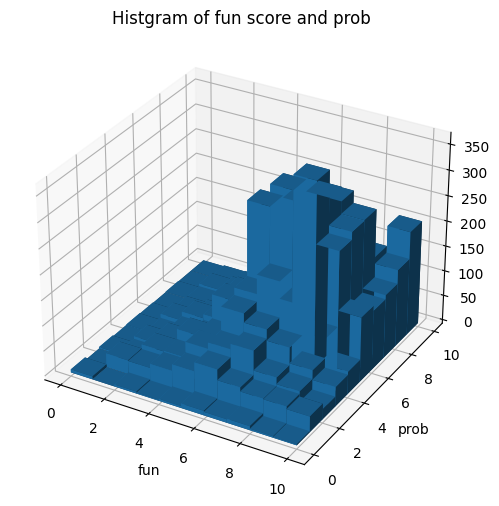

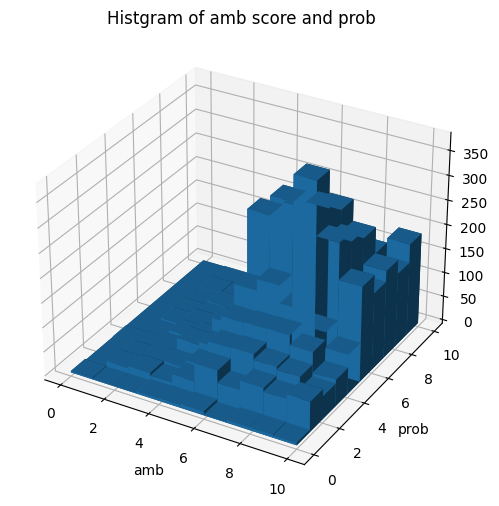

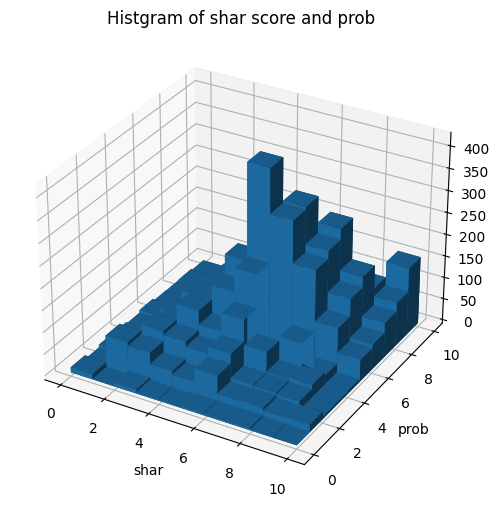

In [32]:
scores_prob_hist(df_need)